In [2]:
import optuna as opt
import pickle as pkl
import sys

In [16]:
from pscapes.landscape_class import ProteinLandscape
from pscapes.utils import dict_to_np_array, np_array_to_dict
from src.ml_utils import train_val_test_split_ohe, landscapes_ohe_to_numpy


In [19]:
SEQ_LEN = 4
AA_ALPHABET  = 'ACDEFGHIKLMNPQRSTVWY'
ALPHABET_LEN = len(AA_ALPHABET)
#K_VALUES_TO_LOAD = range(SEQ_LEN)       
REPLICATES = 1 #we only optimise hyperparameters on a single set of replicates for computational efficiency
N_TRIALS_MULTIPLIER = 10 #15 #we use a multiplier -- the larger the hparam space, the more trials 
PATIENCE = 15
MIN_DELTA = 1e-5
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes    = [32, 64, 128, 256]
n_epochs = 150
    

In [3]:
with open('results/NK_hyperopt_results.pkl', 'rb') as file: 
    nk_opt_results = pkl.load(file)

In [6]:
nk_opt_results['linear'][4].best_params

{'lr': 0.001, 'batch_size': 32}

In [32]:
import matplotlib.pyplot as plt

In [33]:
c = [trial.value for trial in gb1_opt_results['mlp'][0].trials]

(array([14.,  4.,  0.,  1.,  3.,  3.,  4.,  3.,  2.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([0.01307887, 0.0195077 , 0.02593653, 0.03236536, 0.03879419,
        0.04522302, 0.05165185, 0.05808068, 0.0645095 , 0.07093833,
        0.07736716, 0.08379599, 0.09022482, 0.09665365, 0.10308248,
        0.10951131, 0.11594014, 0.12236896, 0.12879779, 0.13522662,
        0.14165545]),
 <BarContainer object of 20 artists>)

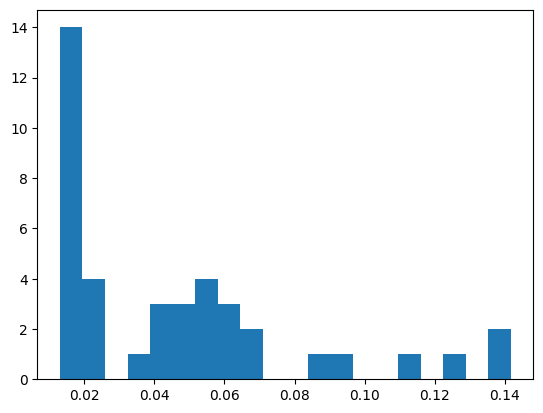

In [35]:
plt.hist(c, bins=20)

In [30]:
gb1_opt_results['mlp'][0].get_trials()

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.016487197039877773], datetime_start=datetime.datetime(2025, 1, 11, 3, 44, 12, 368006), datetime_complete=datetime.datetime(2025, 1, 11, 3, 44, 22, 503439), params={'lr': 0.001, 'batch_size': 128, 'n_hidden_layers': 3, 'hidden0_size': 128, 'hidden1_size': 512, 'hidden2_size': 64}, user_attrs={'epoch_validation_losses': [0.04048800333087348, 0.03929367049013154, 0.025886064805721833, 0.023158444559312093, 0.023753673207188436, 0.01884541505063742, 0.017616648787348452, 0.01948288581886534, 0.018560769536603496, 0.015634552973235752, 0.016089551490179058, 0.01525968094790449, 0.015906608361608773, 0.016117793288855355, 0.01603867226256594, 0.01598678972232708, 0.01504628675184765, 0.016177923099919205, 0.015505125580387096, 0.014469336857920576, 0.014805068502644613, 0.016065651534610603, 0.014866577855003523, 0.01453771544679589, 0.014858604474900826, 0.015925586864626494, 0.015179874528380963, 0.015767394788504058, 0.0168739315

In [10]:
landscape = ProteinLandscape(csv_path='../data/experimental_datasets/G_prot_4_mut_seq_space_only.csv', amino_acids=AA_ALPHABET)


In [11]:
LANDSCAPES = [landscape.fit_OHE()]


In [17]:
landscapes_ohe, xy_train, xy_val, xy_test, x_test, y_test = train_val_test_split_ohe(LANDSCAPES, test_split=0.75, val_split=0.2, random_state=1)


In [23]:
x_train_np, y_train_np = landscapes_ohe_to_numpy(xy_train) #intialise flattened np arrays for RF and GB training 
x_val_np, y_val_np = landscapes_ohe_to_numpy(xy_val)
    

In [18]:
landscapes_ohe[0][0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [21]:
xy_train[0][0]

(tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]),
 tensor([0.0074]))

In [25]:
x_train_np[0][0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)